- Lambton College at Queen’s College of Business, Technology and Public Safety
- Program: Big Data Analytics – DSMM
- Assignment 4: Convolutional Neural Networks (CNN) for Image Processing
- Course: Neural Networks and Deep Learning (3104) 
- Professor: Ishant Gupta
- Student: David Rocha (c0927458) 

**1. About the Dataset**
- The assignment uses the Intel Image Classification dataset, which contains around 25,000 images in 6 categories (buildings, forest, glacier, mountain, sea, street).
- The dataset can be downloaded from Kaggle at: https://www.kaggle.com/datasets/puneet6060/intel-image-classification

**2. Data Loading and Preprocessing**
- **a. Loading the Dataset:** I will used Keras’s ImageDataGenerator to load images from directories, perform augmentation, and normalize pixel values.

In [82]:
# Importing the required libraries
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [83]:
# Defining the directories and the paths
base_dir = 'Image_Classification'
train_dir = os.path.join(base_dir, 'seg_train')
test_dir = os.path.join(base_dir, 'seg_test')

In [ ]:
# Creating ImageDataGenerator for training with augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,              # Normalize pixel values
    rotation_range=20,           # Random rotations
    width_shift_range=0.2,       # Horizontal shifts
    height_shift_range=0.2,      # Vertical shifts
    shear_range=0.2,             # Shear transformations
    zoom_range=0.2,              # Zooming in/out
    horizontal_flip=True,        # Horizontal flips
    validation_split=0.2         # Split 20% for validation
)

# Flow training images in batches of 32 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize images to 150x150 pixels
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
# Creating a generator for validation set
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# Creating ImageDataGenerator for testing with normalization
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

Found 11230 images belonging to 6 classes.
Found 2804 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


- **b. Visualizing a Few Images:** Displaying a few images along with their labels to verify the loading process:

In [85]:
import numpy as np

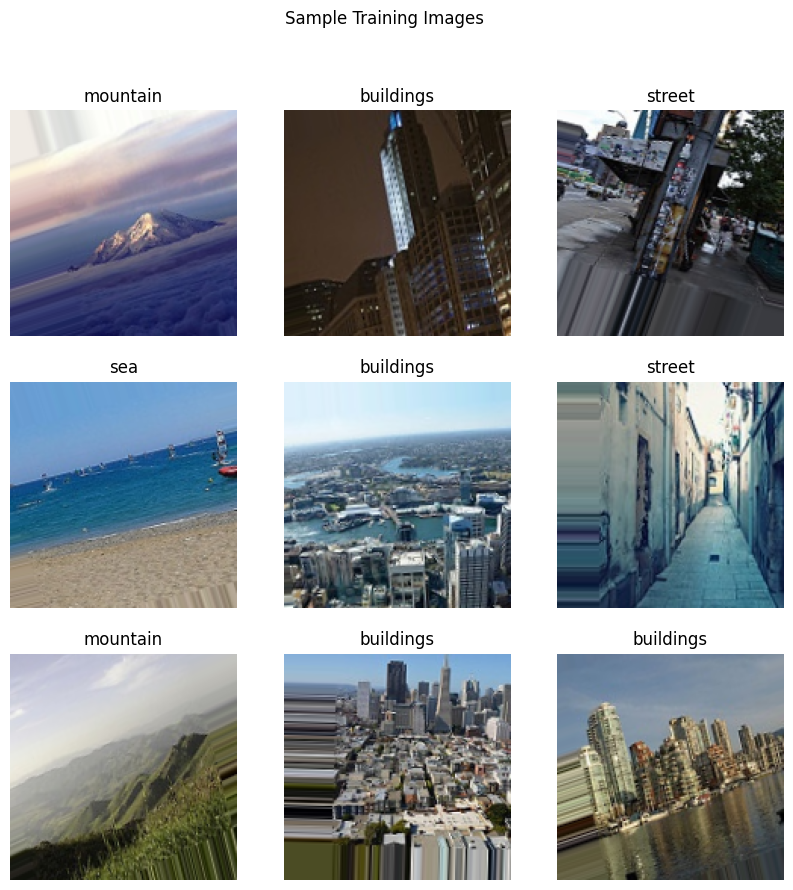

In [ ]:
# Getting a batch of images and labels from the generator
images, labels = next(train_generator)
class_labels = list(train_generator.class_indices.keys())

# Plotting some images with their labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    # Get the label name by finding the index of 1 in the label array
    label_index = np.argmax(labels[i])
    plt.title(class_labels[label_index])
    plt.axis('off')
plt.suptitle("Sample Training Images")
plt.show()


**3. Model Building:** Creating a CNN model using Keras’s Sequential API. The architecture will include:

- Convolutional Layers: 3 layers with ReLU activation.
- Pooling Layers: MaxPooling for downsampling.
- Dropout Layer: To prevent overfitting.
- Flatten and Dense Layers: To connect to the output.
- Output Layer: Softmax activation for multi-class classification.

In [87]:
# Importing the required libraries
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras import Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

In [ ]:
# Creating the CNN model
model = Sequential(name='my_sequential_model')

# Input layer
model.add(Input(shape=(150, 150, 3), name='input_layer'))

# First Convolutional Layer
model.add(Conv2D(32, (3,3), activation='relu', name='conv1'))
model.add(MaxPooling2D((2,2), name='pool1'))

# Second Convolutional Layer
model.add(Conv2D(64, (3,3), activation='relu', name='conv2'))
model.add(MaxPooling2D((2,2), name='pool2'))

# Flatten layer to feed the output of the convolutional layers to the dense layers
model.add(Flatten(name='flatten'))
model.add(Dense(128, activation='relu', name='dense1'))

# Dropout layer to prevent overfitting
model.add(Dropout(0.5, name='dropout'))
# Output layer with 6 units (6 classes)
model.add(Dense(6, activation='softmax', name='output'))

In [89]:
# Compiling the model with an Adam optimizer and categorical crossentropy
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary() 

Model: "my_sequential_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 82944)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │    10,616,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,637,126 (40.58 MB)

 Trainable params: 10,637,126 (40.58 MB)

 Non-trainable params: 0 (0.00 B)

**4. Model Training:** Training the CNN using the training generator and validate on the validation generator.

In [90]:
# Training the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size
)


Epoch 1/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 123s 349ms/step - accuracy: 0.4420 - loss: 1.6041 - val_accuracy: 0.6232 - val_loss: 0.9923
Epoch 2/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5938 - loss: 1.0020 - val_accuracy: 0.6214 - val_loss: 0.9931
Epoch 3/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 114s 325ms/step - accuracy: 0.5953 - loss: 1.0333 - val_accuracy: 0.6286 - val_loss: 0.9596
Epoch 4/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.4688 - loss: 1.1771 - val_accuracy: 0.6394 - val_loss: 0.9432
Epoch 5/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 112s 320ms/step - accuracy: 0.6276 - loss: 0.9726 - val_accuracy: 0.6717 - val_loss: 0.8565
Epoch 6/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 12s 35ms/step - accuracy: 0.6250 - loss: 0.8879 - val_accuracy: 0.6839 - val_loss: 0.8461
Epoch 7/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 118s 336ms/step - accuracy: 0.6514 - loss: 0.9185 - val_accuracy: 0.7101 - val_loss: 0.8017
Epoch 8/20
350/350 ━━━━━━━━━━━━━━━━━━━━ 12s 34ms/step - accuracy: 0.5938 - loss: 0

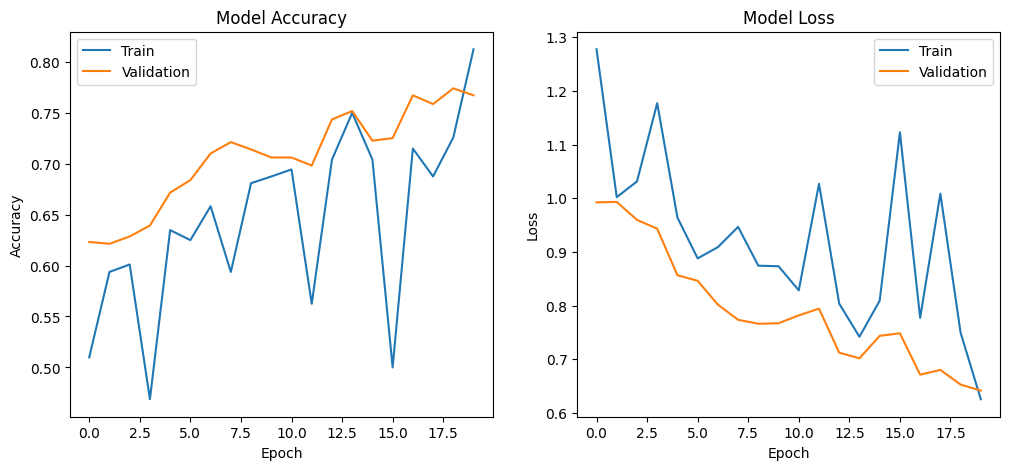

In [92]:
# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

**5. Model Evaluation**
- **a. Evaluating on the Test Set:** Using the test generator to evaluate your model

In [93]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [94]:
# Evaluating the model on test data
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print("Test Accuracy:", test_acc)

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.8024 - loss: 0.5957
Test Accuracy: 0.7849462628364563


In [ ]:
# Predictions on test data
test_generator.reset()
predictions = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 50ms/step


In [96]:
# True labels
true_classes = test_generator.classes[:len(predicted_classes)]
class_labels = list(test_generator.class_indices.keys())

- **b. Detailed Metrics (Precision, Recall, F1-score):** Generating predictions on the test set and calculating detailed metrics.

In [ ]:
# Classification report
report = classification_report(true_classes, predicted_classes, target_names=class_labels)

# Displaying classification report
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

   buildings       0.76      0.76      0.76       437
      forest       0.83      0.98      0.90       474
     glacier       0.82      0.73      0.77       553
    mountain       0.73      0.79      0.76       525
         sea       0.85      0.66      0.74       510
      street       0.74      0.80      0.77       477

    accuracy                           0.78      2976
   macro avg       0.79      0.79      0.78      2976
weighted avg       0.79      0.78      0.78      2976



- **c. Confusion Matrix Visualization:** Visualizing the confusion matrix using matplotlib.

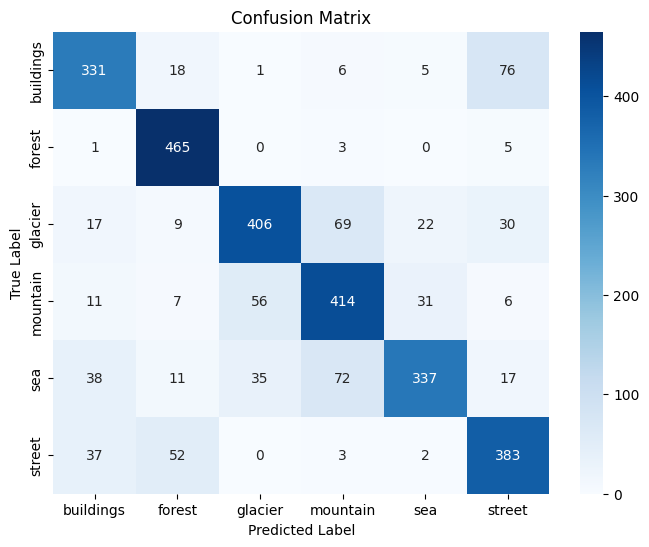

In [98]:
# Computing confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plotting confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

**6. Visualization and Interpretation**

- **a. Displaying Misclassified Images:** After evaluating the model on the test set, it can identify misclassified images. The code below loads the misclassified images and displays a few examples with both the actual and predicted labels.

In [99]:
# Importing the required libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Creating a test generator with batch_size=1 to make indexing simpler
test_datagen_for_display = ImageDataGenerator(rescale=1./255)
test_generator_for_display = test_datagen_for_display.flow_from_directory(
    test_dir,                 # Target directory
    target_size=(150, 150),   
    batch_size=1,
    class_mode='categorical',
    shuffle=False             
)

Found 3000 images belonging to 6 classes.


In [ ]:
# Generating predictions for the test images
predictions_for_display = model.predict(test_generator_for_display, 
                                          steps=test_generator_for_display.samples, 
                                          verbose=1)
predicted_classes_for_display = np.argmax(predictions_for_display, axis=1)
true_classes_for_display = test_generator_for_display.classes
class_labels = list(test_generator_for_display.class_indices.keys())

# Finding indices where the prediction does not match the true label
misclassified_indices = np.where(predicted_classes_for_display != true_classes_for_display)[0]

c:\Users\silve\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3000/3000 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step


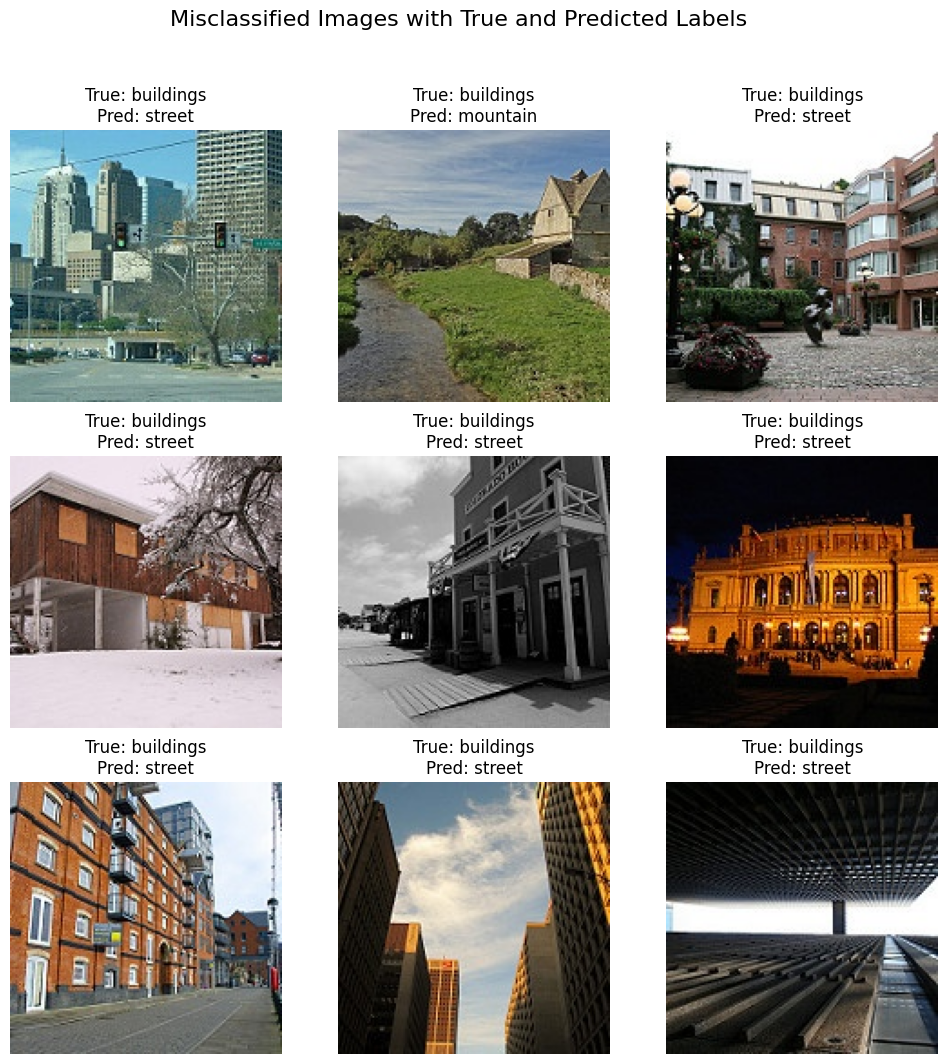

In [ ]:
# Displaying a few misclassified images
num_to_display = min(9, len(misclassified_indices))
plt.figure(figsize=(12, 12))
for i, idx in enumerate(misclassified_indices[:num_to_display]):
    # Retrieve the image and label using the index
    image, _ = test_generator_for_display[idx]  # image shape: (1, 150, 150, 3)
    image = image[0]  # Removing the batch dimension
    true_label = class_labels[true_classes_for_display[idx]]
    predicted_label = class_labels[predicted_classes_for_display[idx]]
    
    plt.subplot(3, 3, i+1) # 3x3 grid, i+1 is the subplot index
    plt.imshow(image)
    plt.title(f"True: {true_label}\nPred: {predicted_label}")
    plt.axis('off')
plt.suptitle("Misclassified Images with True and Predicted Labels", fontsize=16)
plt.show()

The last code helps to identify indices where the model's prediction does not match the true label and verifies by loading and displaying a few misclassified images. This visualization helps to understand which images the model struggles with and may reveal potential patterns or ambiguities in the dataset.

- **b. Plotting Feature Maps from the First Convolution Layer:** Visualizing feature maps helps to see what parts of the image the CNN is focusing on. The code below creates a new model that outputs the activations from the first convolutional layer. Then, it processes a single image and plots all the filter outputs.

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

Loading image: Image_Classification\seg_test\mountain\20133.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


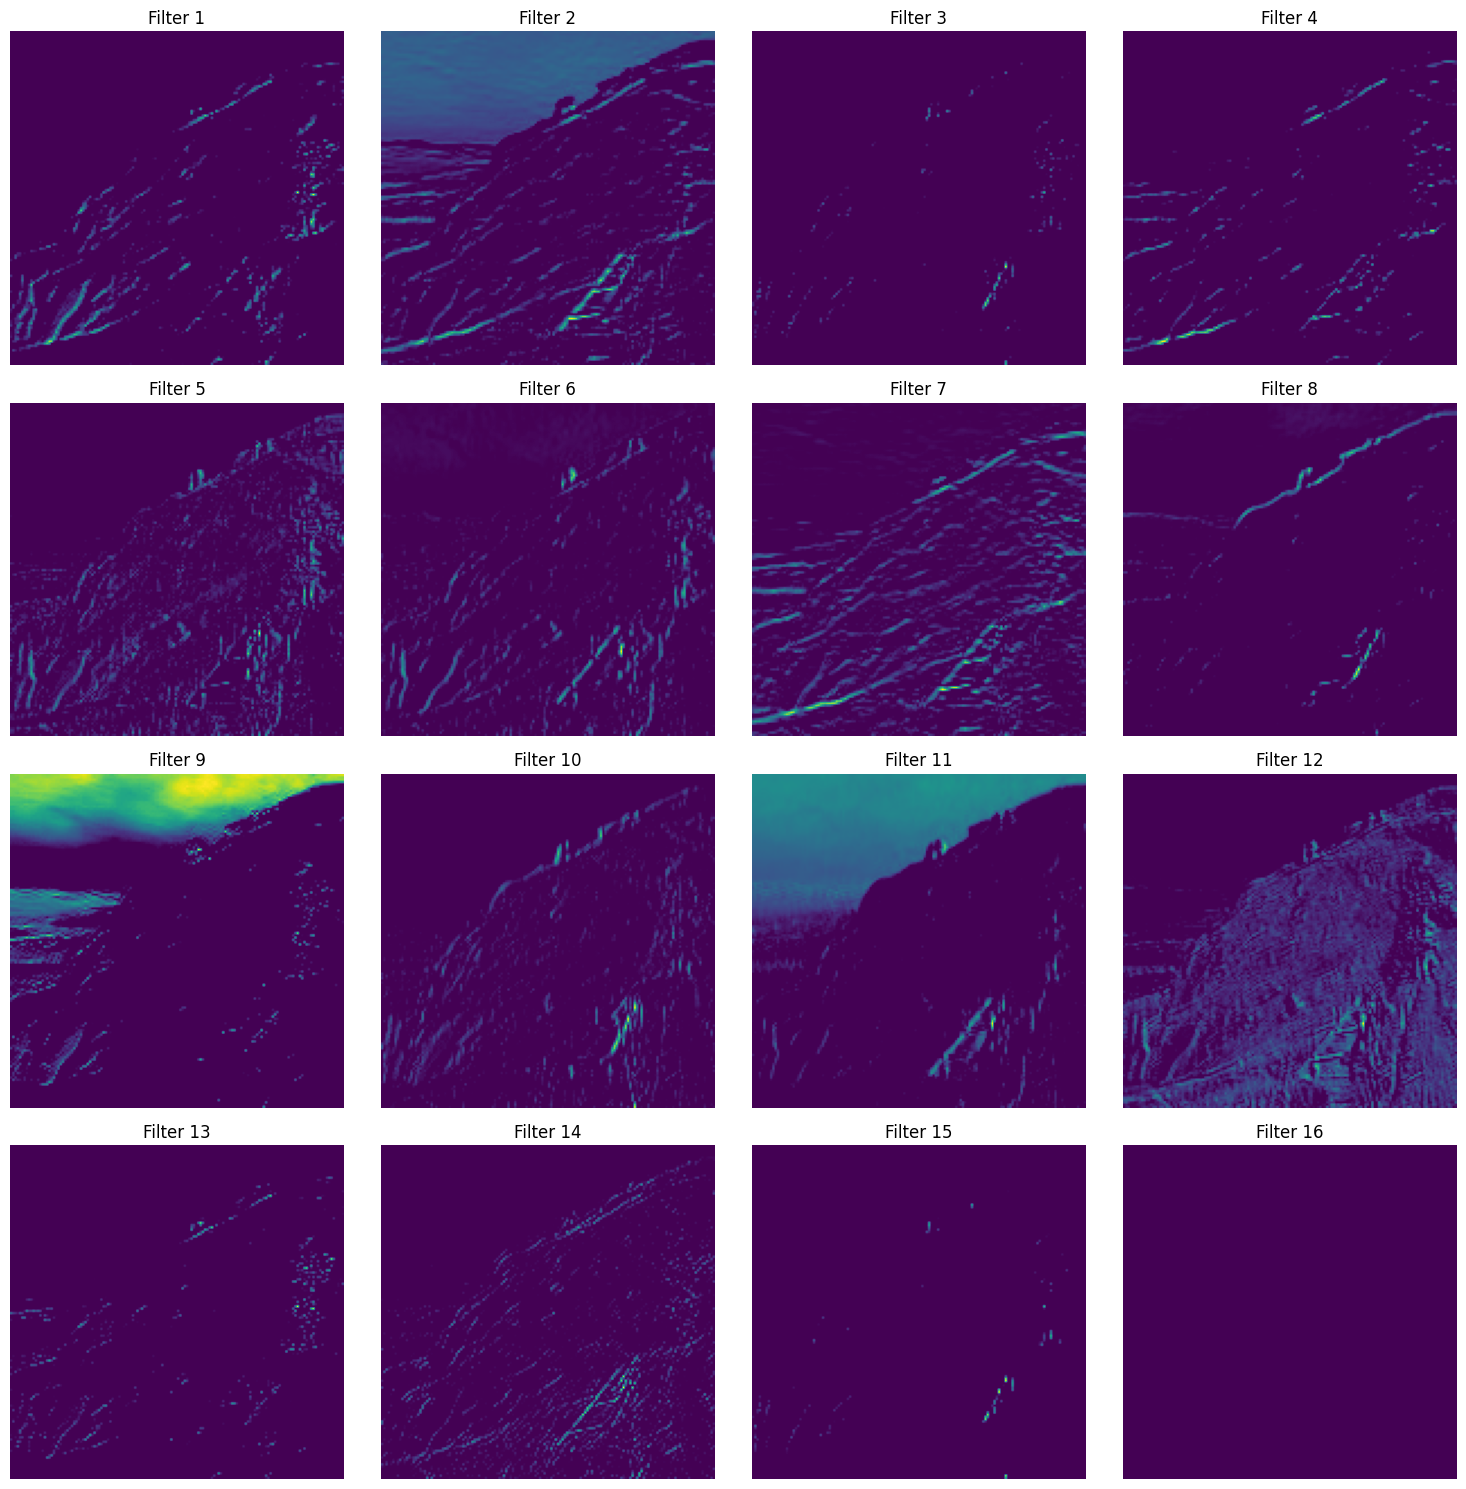

In [ ]:
# Finding the first Conv2D layer in the model
first_conv_layer = None
for layer in model.layers:
    if isinstance(layer, tf.keras.layers.Conv2D):
        first_conv_layer = layer
        break

if first_conv_layer is None:
    print("No Conv2D layer found in the model.")
else:
    # Creating a new model that outputs the feature maps of the first Conv2D layer
    feature_model = Model(inputs=model.inputs, outputs=first_conv_layer.output)

    # List subfolders in test_dir (e.g., ["buildings", "forest", "mountain", ...])
    subfolders = [
        f for f in os.listdir(test_dir)
        if os.path.isdir(os.path.join(test_dir, f))
    ]
    if not subfolders:
        raise ValueError("No subfolders found in test_dir!")

    # Picking a folder
    first_subfolder = subfolders[3]
    subfolder_path = os.path.join(test_dir, first_subfolder)

    # List image files in that subfolder
    image_files = [
        f for f in os.listdir(subfolder_path)
        if os.path.isfile(os.path.join(subfolder_path, f))
    ]
    if not image_files:
        raise ValueError(f"No image files found in subfolder: {subfolder_path}")

    # Picking the first image file
    first_image_file = image_files[10]
    image_path = os.path.join(subfolder_path, first_image_file)

    print(f"Loading image: {image_path}")

    # Loading the image at the correct size
    example_img_pil = load_img(image_path, target_size=(150, 150))
    example_img_array = img_to_array(example_img_pil)

    # Normalizing pixel values from [0,255] to [0,1]
    example_img_array = example_img_array / 255.0

    # Add a batch dimension to the image
    example_img_input = np.expand_dims(example_img_array, axis=0)

    # Predicting the feature maps
    feature_maps = feature_model.predict(example_img_input)

    # Plotting the feature maps
    num_features = feature_maps.shape[-1]
    plt.figure(figsize=(15, 15))
    for i in range(min(num_features, 16)):
        plt.subplot(4, 4, i + 1)
        feature_map = feature_maps[0, :, :, i]
        plt.imshow(feature_map, cmap='viridis')
        plt.title(f'Filter {i + 1}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()


**7. Model Performance Explanation & Areas for Improvement**
- Model Performance:

The CNN achieves a certain accuracy on the test set; however, a number of misclassified images indicate that there is room for improvement.

The accuracy and loss curves during training (as plotted earlier) provide insights into how well the model learns over epochs.

- Areas for Improvement:

Data Augmentation: Further augmenting the training data (e.g., using different rotation angles, brightness adjustments, or other transformations) can help improve the model’s robustness.

Hyperparameter Tuning: Experiment with different network architectures, learning rates, batch sizes, or optimizers (e.g., trying SGD with momentum).

Regularization: In addition to dropout, considering techniques such as L2 regularization or early stopping can reduce overfitting.

Model Depth and Complexity: Increasing the depth or number of convolutional layers might allow the model to learn more complex features, although this also increases the risk of overfitting if not managed properly.

**- Summary:**

The provided visualizations (misclassified images and feature maps) offer a window into the strengths and limitations of the CNN. By analyzing these, we can identify whether the network is failing to capture crucial details or if some classes are more challenging to classify. This analysis should inform our next steps for model tuning and potential architectural changes.